[View in Colaboratory](https://colab.research.google.com/github/SakshiPriya/basic-neural-net/blob/master/pytorch_version_.ipynb)

In [1]:
!pip install torch

    100% |████████████████████████████████| 519.5MB 15kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x562b5f448000 @  0x7f80d4e7f1c4 0x562b05cbb0d8 0x562b05da4d5d 0x562b05cce77a 0x562b05cd3462 0x562b05ccbb3a 0x562b05cd382e 0x562b05ccbb3a 0x562b05cd382e 0x562b05ccbb3a 0x562b05cd382e 0x562b05ccbb3a 0x562b05cd3e1f 0x562b05ccbb3a 0x562b05cd382e 0x562b05ccbb3a 0x562b05cd382e 0x562b05cd3462 0x562b05cd3462 0x562b05ccbb3a 0x562b05cd3e1f 0x562b05cd3462 0x562b05ccbb3a 0x562b05cd3e1f 0x562b05ccbb3a 0x562b05cd3e1f 0x562b05ccbb3a 0x562b05cd382e 0x562b05ccbb3a 0x562b05cfc50f 0x562b05cf7202


In [5]:
import torch
import matplotlib.pyplot as plt

#parametrs


layers=3
batch_size=1000
input_feature=100
l1_neurno=50
l2_neurno=25
l3_neurno=1
num_epoch=1300
lr_rate=0.01
loss=[]


#input,output,weight initialization
Z=torch.randint(1,100,(input_feature,batch_size))
Y=torch.randint(0,2,(l3_neurno,batch_size))
W1=torch.rand(l1_neurno,input_feature)
W2=torch.rand(l2_neurno,l1_neurno)
W3=torch.rand(l3_neurno,l2_neurno)


# functions
def normalize(Z):
   sh=Z.size()[0]
   mu=Z.mean(dim=1).view(sh,1)
   z=Z-mu
   std=z.std(dim=1).view(sh,1)
   Z=z/std
   return Z

for epoch in range(num_epoch):
    #forwardpass

    L1=W1.mm(normalize(Z))
    Z1=normalize(L1).clamp(min=0)
    L2=W2.mm(Z1)
    Z2=normalize(L2).clamp(min=0)
    L3=W3.mm(Z2)
    Ypred=torch.sigmoid(normalize(L3))
                             
     #finding loss
    Loss=-(Y.mm(torch.log(Ypred.t()))+(1-Y).mm(torch.log(1-Ypred.t())))
    Loss=Loss/batch_size
    loss.append(Loss)
     #finding gradient
    dL3=Ypred-Y
    dW3=dL3.mm(Z2.t())
    dZ2=(W3.t()).mm(dL3)
    dL2=dZ2.clone()
    dL2[L2<0]=0
    dW2=dL2.mm(Z1.t())
    dZ1=(W2.t()).mm(dL2)
    dL1=dZ1.clone()
    dL1[L1<0]=0
    dW1=dL1.mm(Z.t())
    
         
     #weight update
    W1=W1-lr_rate*dW1
    W2=W2-lr_rate*dW2
    W3=W3-lr_rate*dW3
     
     
print(Loss)    


tensor([[0.4380]])


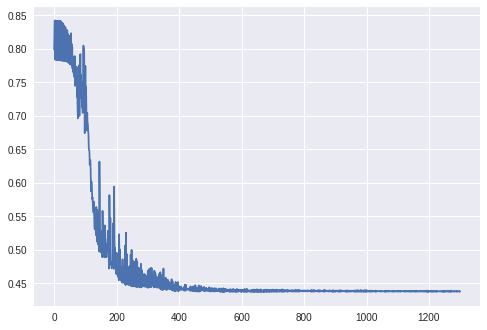

In [6]:
plt.figure()
plt.plot(loss)
plt.show()

In [7]:
def test(n):
  Z=torch.randint(1,100,(input_feature,n))
  Y=torch.randint(0,2,(l3_neurno,n))
  L1=W1.mm(normalize(Z))
  Z1=normalize(L1).clamp(min=0)
  L2=W2.mm(Z1)
  Z2=normalize(L2).clamp(min=0)
  L3=W3.mm(Z2)
  Ypred=torch.sigmoid(normalize(L3))
  print('Y:',Y,'Ypred:',torch.round(Ypred))
  
  
test(10)

('Y:', tensor([[1., 0., 1., 0., 0., 1., 0., 1., 1., 0.]]), 'Ypred:', tensor([[0., 0., 1., 1., 0., 0., 1., 1., 1., 0.]]))
